# Chapter 10: Introduction to Artifical Neural Networks with Keras

- This is the start of my journey for NN and DL following the book [Hands-On Machine Learning with Scikit-Learn, Keras and Tensorflow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

- The part 2 of the book details about the concepts of NN/DL along with tensorflow 2.0 implementations

- Some other resources might be referred as well for conceptual understanding

In [1]:
# Using the NN env

!conda info --env

# conda environments:
#
base                  *  /Users/pushpakruhil/opt/anaconda3
other                    /Users/pushpakruhil/opt/anaconda3/envs/other
tf                       /Users/pushpakruhil/opt/anaconda3/envs/tf



In [2]:
import numpy as np
import tensorflow as tf

2023-12-29 23:22:04.627176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


***
- We know the basics of ANN, how it all started from BNN
- Let's directly jump into the deeper topics

# Perceptron

- Simplest ANN architecture
- Based on a slightly different artificial neuron called Threshold Logic Unit (TLU)
    - Or sometimes called Linear Threshold Unit (LTU)
- TLU computes a weighted sum of the inputs ($\textbf{X}^T\textbf{w}$)
- Then applies a step function and outputs the result

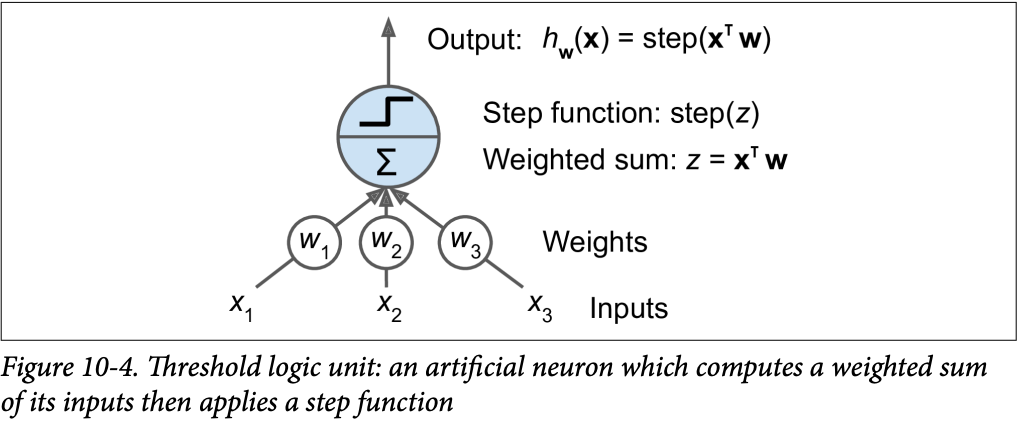


## Common step functions


$$
\text{heaviside}(z) = \begin{cases}
0 & \text{if }z<0\\
1 & \text{if }z>=0
\end{cases}
\\
\\
$$

$$
\text{sgn}(z) = \begin{cases}
-1 & \text{if }z<0\\
0 & \text{if }z=0\\
1 & \text{if }z>0
\end{cases}
$$
***

- Fully connected(or dense) layer: every neuron in one layer is connected to every neuron in the previous layer
- Bias unit: Like an intercept, $x_0 = 1$

## Mathematical notation
$$
h_{W, b}(X) = \phi (XW + b)
$$

Here:
- **X** is the feature matrix
    - shape: (#data_points, #features)
- **W** is the weight matrix. This doesn't include the wieghts of the bias neurons
    - shape: (#features, #artificial_neuron_in_the_layer)
- **b** is the bias vector. Contains the weights between the bias neuron and the artificial neurons
    - One bias term per artificial neuron
- $\phi$ is the Activation function.
    - For TLUs, it's the step function

## Weight update rule for perceptron

- From MLT:
    $$
    w^{t+1} = w^t + x_iy_i
    $$

- From book:
    $$
    w_{i,j}^{(\text{next step})} = w_{i,j} + \eta(y_j - \hat{y_j})x_i
    $$
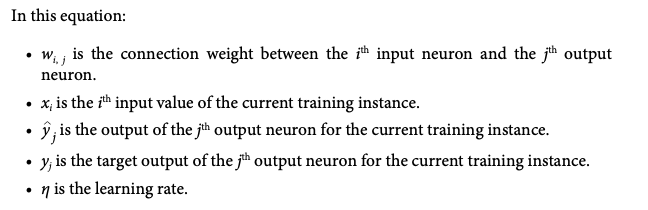   

- Linear decision boundary

In [3]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [12]:
X, y = load_iris(return_X_y=True)
X = X[:, (2,3)]
y = (y == 0).astype(int)

In [13]:
percp = Perceptron()
percp.fit(X, y)

Perceptron()

In [14]:
percp.predict([[2,0.5]])

array([0])

- **A Perceptron alone CANNOT solve the XOR problem**

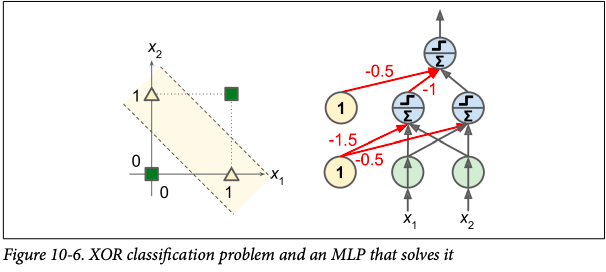

# Multilayer Perceptron and Backpropogation

- To learn more complex patterns and models

Composed of:
1) Passthrough (input) layer
1) one or more TLUs called the hidden layers
1) one last TLU called the output layer

- The layers close to the input layer are usually called the lower layers 
- The ones close to the outputs are usually called the upper layers
- Every layer except the output layer includes a bias neuron and is fully connected to the next layer

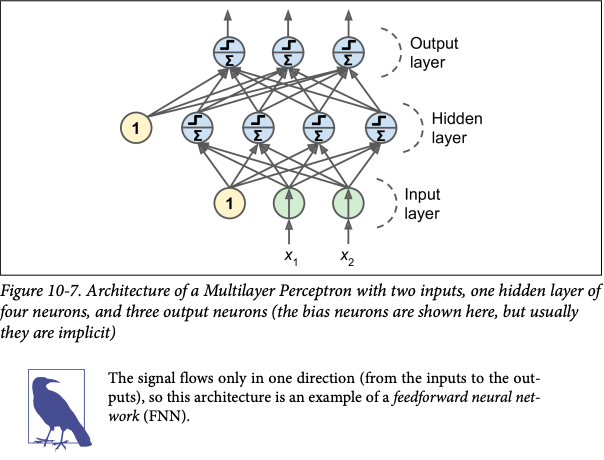

- When an ANN contains a deep stack of hidden layers, it's called a **deep neural network**
    - The definition of number of layers in DNN is fuzzy
    

- MLP is a feed-forward neural network

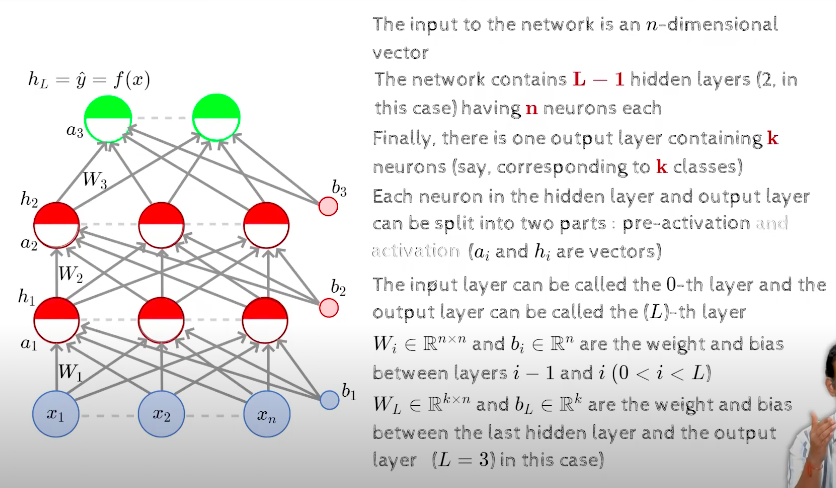

- Pre-activation at any layer $i$ (white region of the neurons) is given by:
$$
a_i(x) = b_i + W_ih_{i-1}(x)
$$

As an example, for $a_1$, we would have the following:

$$ a_1 = 
\begin{bmatrix}
a_{11} \\ a_{12} \\ a_{13}
\end{bmatrix} = 
\begin{bmatrix}
b_1 \\ b_2 \\ b_3
\end{bmatrix} + 
\begin{bmatrix}
W_{111} & W_{112} & W_{113}\\
W_{121} & W_{122} & W_{123}\\
W_{131} & W_{132} & W_{133}
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}
$$

- Activation at layer $i$  (red region of the neurons) is given by:
$$
h_i(x) = g(a_i(x))
$$

As an example, for $a_1$, we would have the following:

$$
h_1(x) = g \left( \begin{bmatrix}
a_{11} \\ a_{12} \\ a_{13}
\end{bmatrix} \right) = \begin{bmatrix}
g(a_{11}) \\ g(a_{12}) \\ g(a_{13})
\end{bmatrix}
$$
element wise activation

Using sigmoid activation function:
$$
g(a_{11}) = \dfrac{1}{1+ e^{-a_{11}}}
$$

- Activation at the output layer is given by:

$$
h_L(x) = \hat{y} = f(x) = O(a_L(x))
$$

- A different function O because we may or may not use sigmoid function for output

- We can expand to get a mathematical equation:
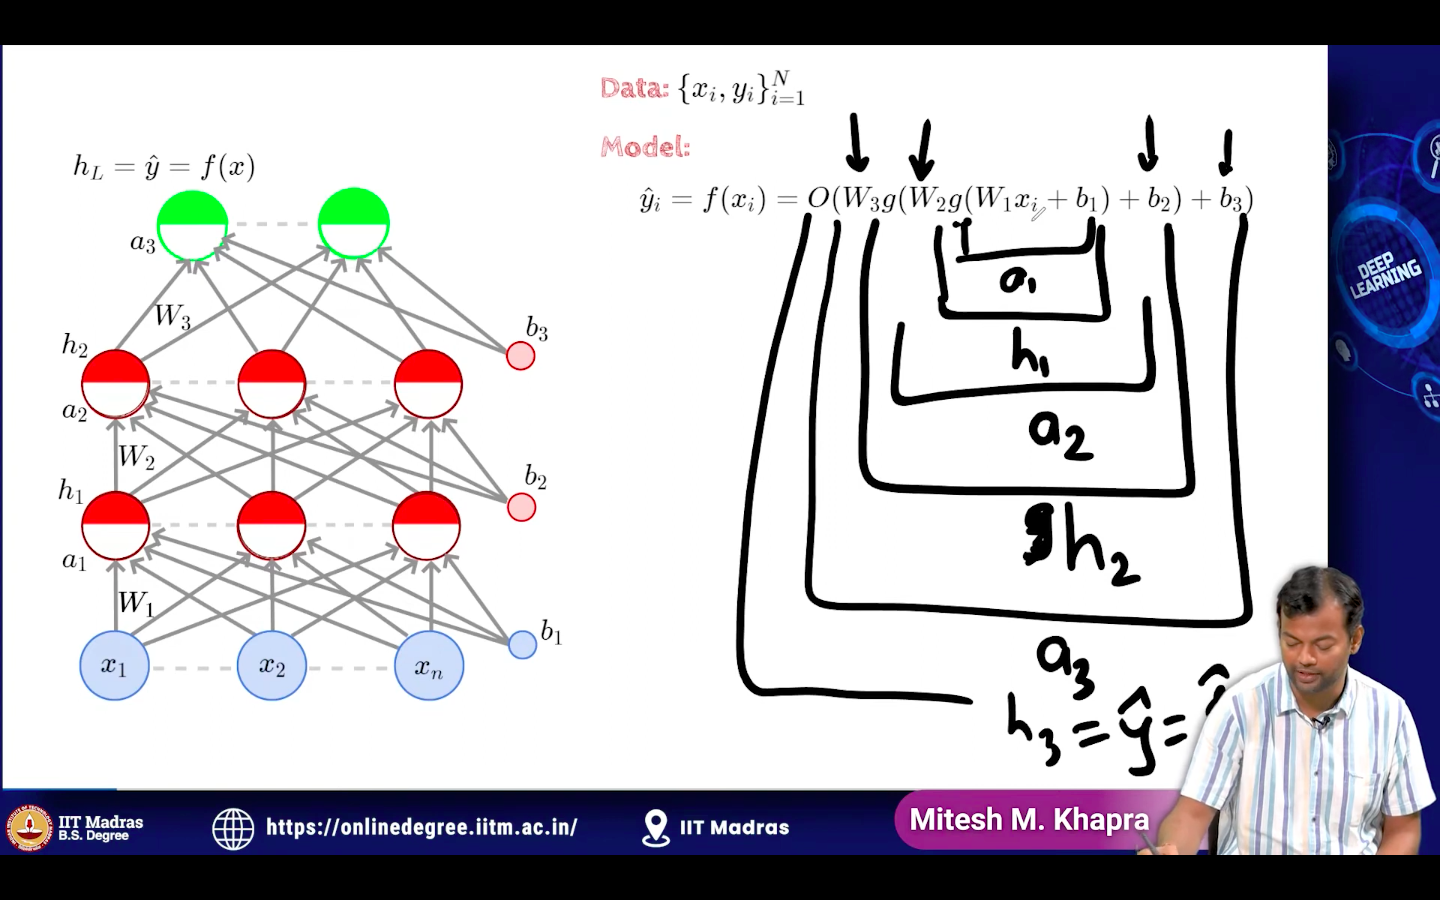

## Algorithm summarized
- It handles one mini-batch at a time (for example, containing 32 instances each), and it goes through the full training set multiple times. Each pass is called an epoch.
- Each mini-batch is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). 
- The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since theyare needed for the backward pass.

- Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
- Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.

- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. 
- As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).
- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

## Typical Regression MLP Architecture

- Typically, no activation function is used for regression output
- If the output needs to be strictly positive, we can use ReLU function ($max(0, z)$) for output
- Alternatively, we can use softplus function ($log(1+e^z)$)

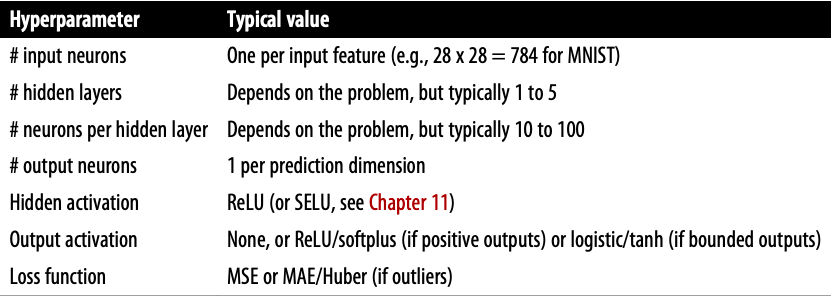

## Typical Classification MLP Architecture

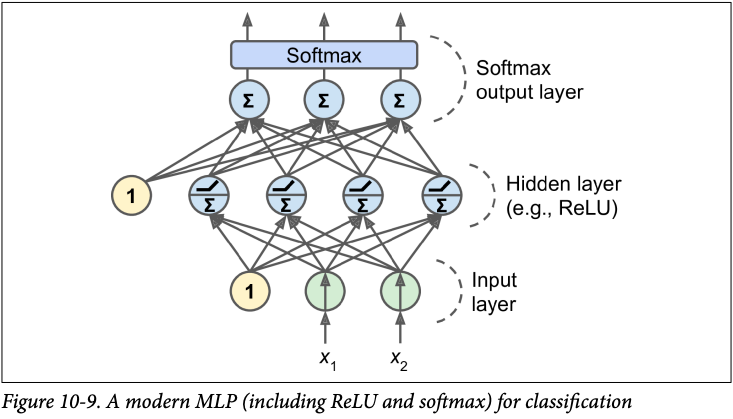

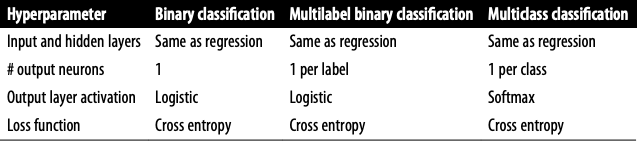


## Implementing MLP using Keras

- Let's look at an implementation of MLP using TF and Keras

In [15]:
tf.__version__

'2.15.0'

### Building an Image Classifier using the Sequential API

- We will be working with the fashion dataset

In [4]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
# Scaling the dataset to 0-1 scale by dividing each value with max intensity

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
# Defining a list of each class' name
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape = (28,28) )) # Input/passthrough layer
model.add(keras.layers.Dense(300, activation='relu')) # First hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation='relu')) # Second hidden layer with 100 neurons
model.add(keras.layers.Dense(10, activation='softmax')) # Output layer for 10 unique classes

2023-12-29 23:25:59.896871: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


***
### Explanation: 
- Line 1 creates a sequential model
    - Simplest keras model for NN
- Line 3 adds a flatten layer with the desired input size
    - Role is to convert each input into a 1D array
    - Computes X.reshape(-1,1)
    - No other parameters, just the size/shape of each instance
- Line 4 adds the first hidden/dense layer with 300 neurons while setting the activation to ReLU
    - Each dense layer manages its own weight matrix
    - Also manages a bias vector
    - After receiving input, it computes the first equation under [Mathematical-notation](#Mathematical-notation)
- Line 5 adds another dense layer with 100 neurons with ReLU activation
- Line 6 adds a final dense layer which is our final layer, with 10 neurons for 10 unique classes with SOFTMAX activation function
    

***
- Instead of adding layers one by one, we can pass a list as well

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28) ), # Input/passthrough layer
    keras.layers.Dense(300, activation='relu'), # First hidden layer with 300 neurons
    keras.layers.Dense(100, activation='relu'), # Second hidden layer with 100 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer for 10 unique classes
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [102]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
model.layers

In [21]:
weights, bias = model.layers[1].get_weights()

In [22]:
weights # Random allocation to break symmetry

# Can set weights using set_weights()

array([[-0.03133766,  0.07156993, -0.05049557, ...,  0.00246748,
         0.07430753, -0.05318724],
       [ 0.01951801,  0.03568214, -0.02528222, ...,  0.05651082,
         0.02438728,  0.02141812],
       [-0.05349728, -0.03776467,  0.07224926, ..., -0.06322152,
        -0.00840462,  0.07267177],
       ...,
       [-0.05832981, -0.06058063, -0.01057137, ...,  0.0364057 ,
         0.07169379,  0.02741598],
       [-0.02295177, -0.02093578,  0.04146486, ..., -0.03760478,
        -0.03480016,  0.05027948],
       [-0.06386656,  0.05588934, -0.07240777, ...,  0.00566879,
         0.01831634, -0.06313087]], dtype=float32)

### Compiling the Model

- Once we have defined the model, we must compile the build to specify the optimizer and the loss

In [23]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd', # Optimize using SGD//back-propogation
    metrics=['accuracy'] # Can pass in a list of metrics to test
             )

In [25]:
history = model.fit(X_train, y_train,
          epochs=30, validation_data=(X_valid, y_valid)
         )

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7038 - accuracy: 0.7731 - val_loss: 0.5435 - val_accuracy: 0.8174
Epoch 2/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4912 - accuracy: 0.8289 - val_loss: 0.4414 - val_accuracy: 0.8498
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4466 - accuracy: 0.8431 - val_loss: 0.4208 - val_accuracy: 0.8564
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4188 - accuracy: 0.8537 - val_loss: 0.4004 - val_accuracy: 0.8626
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3995 - accuracy: 0.8609 - val_loss: 0.3779 - val_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3819 - accuracy: 0.8658 - val_loss: 0.3807 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3691 - accuracy: 0.8698 - val_loss: 0.3600 - val_accuracy:

- Can set class_weight parameter while calling the fit method to handle class imbalance
- Can pass sample_weight argument to give per-instance weights.
    - Useful when labelling is done by some domain expert while some labelling are done by crowdsourcing platforms

In [26]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [27]:
# Most important:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

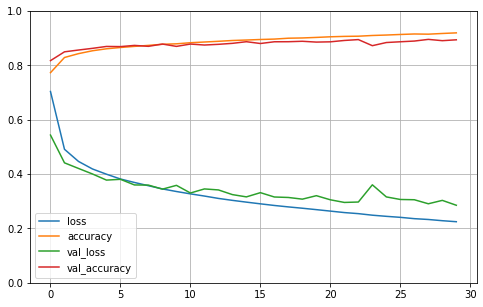

In [28]:
# PLotting history.history
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

- In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. 
- But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. 
- So the training curve should be shifted by half an epoch to the left. 
- If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

### Evaluating the model

- Model can be evaluated using .evaluate() method
    - Not .score


In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 56.3924 - accuracy: 0.8567


[56.39244842529297, 0.8567000031471252]

How to tune the model?
- If not satisfied with the performance, we can tune the hyperparameters
- Start with the learning_rate
- If that doesn't help. then try a different optimizer
    - When changing the optimizer or for the matter of fact, any HP, re-tune the learning rate
- Then go to tuning the model-level HPs like number of hidden layers, neurons, etc etc

### Making Predictions

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new) # Predicts the probability of each class
y_proba

1/1 [==============================] - 0s 304ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_pred = np.argmax(model.predict(X_new), 
                   axis=-1)
y_pred

1/1 [==============================] - 0s 41ms/step


array([9, 2, 1])

In [32]:
for i in y_pred:
    print(class_names[i])

Ankle boot
Pullover
Trouser


### Regression MLP using the Sequential API

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=10, test_size=0.2)

In [75]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

- Very similar to classifier
- Main difference is, in the output layer, we'd have just 1 neuron

In [76]:
X_train[0]

array([ 3.14420000e+00,  3.00000000e+01,  5.78048780e+00,  1.00487805e+00,
        1.24800000e+03,  3.04390244e+00,  3.67000000e+01, -1.19570000e+02])

In [77]:
X_valid[0]

array([   4.3542    ,   37.        ,    6.26937269,    1.11439114,
        889.        ,    3.2804428 ,   33.94      , -118.03      ])

In [78]:
X_train[0].shape

(8,)

In [79]:
# Scaling the dataset

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [83]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train[0].shape[0:]),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])

In [84]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 8)                 0         
                                                                 
 dense_22 (Dense)            (None, 100)               900       
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(loss='mean_squared_error', optimizer='sgd') # Compiling the model before fitting

history = model.fit(X_train, y_train, 
                    epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
387/387 [==============================] - 2s 4ms/step - loss: 0.6814 - val_loss: 1.0595
Epoch 2/20
387/387 [==============================] - 1s 3ms/step - loss: 0.4349 - val_loss: 0.6557
Epoch 3/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3933 - val_loss: 0.3680
Epoch 4/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3775 - val_loss: 0.8273
Epoch 5/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3728 - val_loss: 0.8359
Epoch 6/20
387/387 [==============================] - 1s 4ms/step - loss: 0.3658 - val_loss: 1.0605
Epoch 7/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3675 - val_loss: 0.9595
Epoch 8/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3643 - val_loss: 0.4898
Epoch 9/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3555 - val_loss: 0.6608
Epoch 10/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3619 - val_loss: 0.6732

In [90]:
history.params


{'verbose': 1, 'epochs': 20, 'steps': 387}

In [92]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [93]:
model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 2.8255


2.8255035877227783

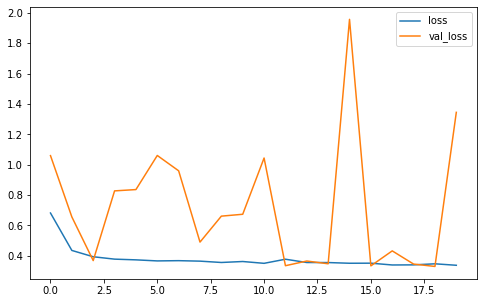

In [95]:
pd.DataFrame(history.history).plot(figsize=(8,5))
# plt.gca().set_ylim(0, 1)
plt.show()

In [96]:
X_new = X_test[:4]

y_pred = model.predict(X_new)

1/1 [==============================] - 3s 3s/step


In [97]:
y_pred

array([[2.1006365],
       [2.8518791],
       [2.444378 ],
       [1.4137278]], dtype=float32)

# Functional API

- Functional API helps us create NNs with more complex topology

- One example is **Wide and Deep NN** (2016)
    - Allows NN to learn deep patterns and simple rules
    
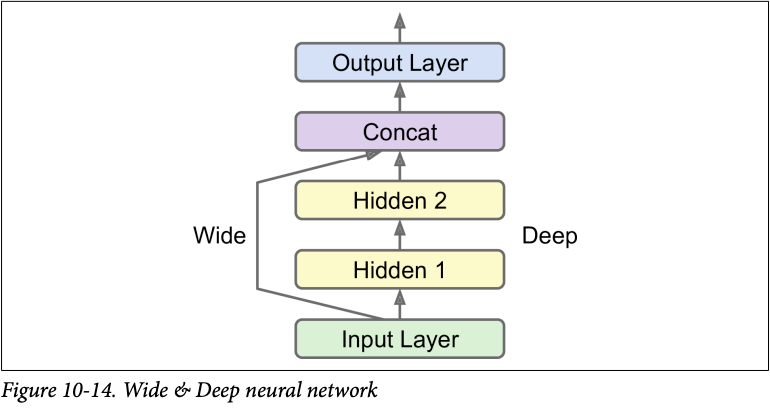

In [115]:
X_train.shape[1:]

(8,)

In [117]:
input_layer = keras.layers.Input(shape=X_train.shape[1:]) # Input layer
hidden1 = keras.layers.Dense(30, activation='relu')(input_layer) # As soon as the layer is created, we call it like a function with prev layer as a param
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_layer, hidden2]) # Make sure it's with capital C
output_layer = keras.layers.Dense(1)(concat) # Output layer called as a function with concat as a param

model = keras.Model(inputs=[input_layer], outputs=[output_layer])


In [118]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_37 (Dense)               (None, 30)           270         ['input_6[0][0]']                
                                                                                                  
 dense_38 (Dense)               (None, 30)           930         ['dense_37[0][0]']               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 38)           0           ['input_6[0][0]',                
                                                                  'dense_38[0][0]']         

***

```python
keras.utils.plot_model(model)
```

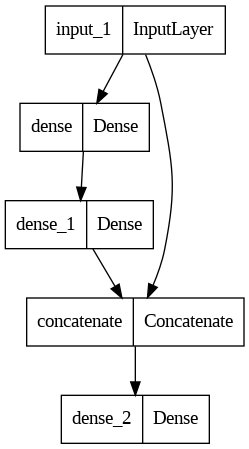

***
- Let's understand each line
- First we created the input layer
    - We can take multiple inputs as well, we'll see it later
- Next, we created a dense layer with 30 neurons and ReLU activation
    - Notice how we call it like a function passing it the input layer
    - This is why it's called the **Functional API**
- Then we follow with the next hidden layer
- Then we created a Concatenate layer.
    - We, once again, immediately use it like a function to concatenate the input and the output of the 2nd hidden layer
    - Can use .concatenate() as well. We directly pass the input params as arguments
- Then, we have the output layer
- Lastly, we create a Keras Model, specifying the inputs and the outputs

In [119]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [121]:
history = model.fit(X_train, y_train,
          epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3215 - val_loss: 0.3184
Epoch 2/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3205 - val_loss: 0.3240
Epoch 3/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3257 - val_loss: 0.8110
Epoch 4/20
387/387 [==============================] - 1s 2ms/step - loss: 0.3171 - val_loss: 0.3658
Epoch 5/20
387/387 [==============================] - 1s 2ms/step - loss: 0.3124 - val_loss: 0.5499
Epoch 6/20
387/387 [==============================] - 1s 2ms/step - loss: 0.3125 - val_loss: 1.3147
Epoch 7/20
387/387 [==============================] - 1s 2ms/step - loss: 0.3122 - val_loss: 0.3117
Epoch 8/20
387/387 [==============================] - 1s 2ms/step - loss: 0.3077 - val_loss: 0.4135
Epoch 9/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3082 - val_loss: 0.3026
Epoch 10/20
387/387 [==============================] - 1s 2ms/step - loss: 0.3066 - val_loss: 0.3017

## Multiple Inputs
- What if we need to send a different subset of inputs from the wide path and a different subject(maybe overlapping subset) from the deep path?
- We can do that as well
- Let's say we want to send 
    - Features 0 to 4 via the wide path
    - Features 2 to 7 via the deep path


In [123]:
input_layer_A = keras.layers.Input(shape=[5], name='wide_path') # Input layer A
input_layer_B = keras.layers.Input(shape=[6], name='deep_path') # Input layer B
hidden1 = keras.layers.Dense(30, activation='relu')(input_layer_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_layer_A, hidden2]) # Make sure it's with capital C
output_layer = keras.layers.Dense(1)(concat) # Output layer called as a function with concat as a param

model = keras.Model(inputs=[input_layer_A, input_layer_B], outputs=[output_layer])


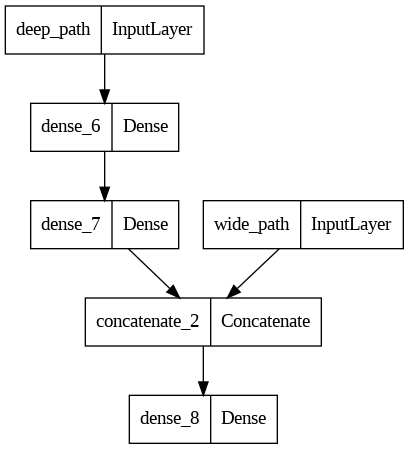

In [126]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='mean_squared_error')

In [127]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [128]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
387/387 [==============================] - 2s 3ms/step - loss: 1.9733 - val_loss: 3.8953
Epoch 2/20
387/387 [==============================] - 1s 2ms/step - loss: 0.7718 - val_loss: 0.9742
Epoch 3/20
387/387 [==============================] - 1s 2ms/step - loss: 0.6233 - val_loss: 0.7183
Epoch 4/20
387/387 [==============================] - 1s 2ms/step - loss: 0.5608 - val_loss: 0.6137
Epoch 5/20
387/387 [==============================] - 1s 2ms/step - loss: 0.5230 - val_loss: 0.5673
Epoch 6/20
387/387 [==============================] - 1s 2ms/step - loss: 0.4978 - val_loss: 0.6388
Epoch 7/20
387/387 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.5324
Epoch 8/20
387/387 [==============================] - 1s 2ms/step - loss: 0.4674 - val_loss: 0.5626
Epoch 9/20
387/387 [==============================] - 1s 3ms/step - loss: 0.4578 - val_loss: 0.4895
Epoch 10/20
387/387 [==============================] - 1s 2ms/step - loss: 0.4497 - val_loss: 0.6444

***
- Note how we passed the input feature matrix during the fit, evaluate or predict
- Alternatively, we can pass a dictionary mapping the input names to the input values:
```python
{
    "wide_input": X_train_A, 
    "deep_input": X_train_B
}
```
***
## Multiple Outputs
- There are many use cases in which you may want to have multiple outputs
1. Task may demand it
    - Eg: May locate and classify main object in an image
1. May have multiple independent task basedo n the same data
1. Another use case is regularization technique

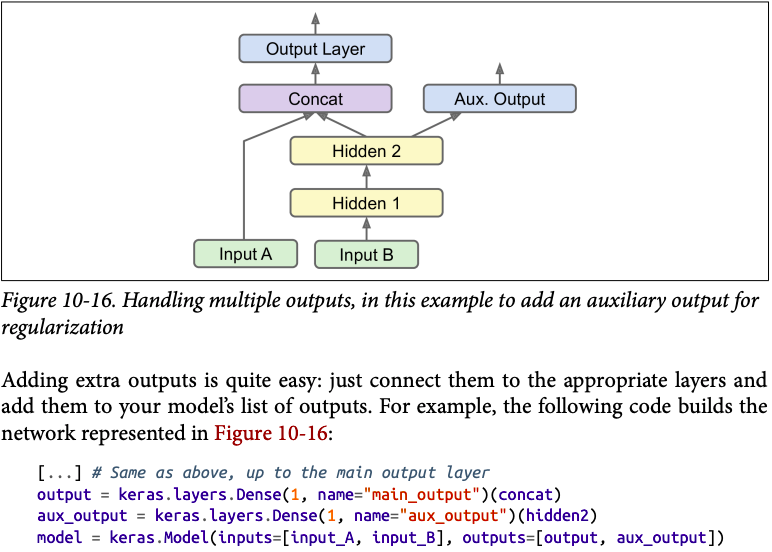

- Each output needs its own loss defined
- Like how we defined the input matrix mapping dictionary, we can do a similar thing for defining the losses while compiling


In [130]:
model.compile(loss={'main_output': 'mse', 'aux_output': 'mse'}, 
              optimizer='sgd',
              loss_weights = {'main_output': 0.9, 'aux_output': 0.1}
             )

- While fitting the model, we need to pass the labels the same number of times as the total outputs
- here, we would pass a list of y_train twice: [y_train, y_train]

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

```python
total_loss, main_loss, aux_loss = model.evaluate(
 [X_test_A, X_test_B], [y_test, y_test])

```

# Dynamic Models using SUbclassing API

- Sequential API allows us to create NN in a layer by layer manner, without any other liberty on the structure
- Functional API allows us to create NN with multiple input/output and in a non-sequential manner
- Subclassing API gives us more liberty on the structure but with a few downfalls(to be discussed)
    - It is fully customizable way to implement feed-forward mechanism for custom-designed DNN in an OOPs fashion
-----

- Both sequential and Functional APIs are declarative and STATIC
- Subclassing API is imperative and DYNAMIC
- Let's implement the same wide and deep NN using sublcassing API


In [132]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        # Inheriting the constructor of the parent/base class
        super().__init__(**kwargs) # to handle args like name
        
        # Now, we define the layers, similarly to how we have been doing
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
        
    def call(self, inputs):
        # Call method is where we define the computation logic
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B) # Functional API call
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.Concatenate()([input_A, hidden2])
        main_output = self.main_output(concat) # Functional API call 
        aux_output = self.aux_output(concat) # FUnctional API call
        return main_output, aux_output

In [134]:
model = WideAndDeepModel()

- This is very similar to Functional API except: 
    - **We do not need to create the inputs**
    - We just use the input argument to the call() method 
    - And we seperate the creation of the layers in the constructor from their usage in the call()
    - We can do anything in the call() method. For loop, if else statements, low level tensorflow operations

- The extra flexibility does come at a cost, though:
1. Model's architecture is hidden within the call() method, so Keras cannot easiliy inspect it
1. It cannot be saved or cloned, unlike the other 2 methods
1. When we call summary(), after compiling, we only get a list of layers without any info on how they are connected
1. Keras cannot check the type and shapes ahead of time, and its easier to make mistakes

- Unless we really need the extra flexibility, we should stick to functional API or sequential API

# Saving and restoring the model

- Let's get back to an example of functional API model
- Again, to mention, this will notwork with subclassing API

In [137]:
input_layer_A = keras.layers.Input(shape=[5], name='wide_path') # Input layer A
input_layer_B = keras.layers.Input(shape=[6], name='deep_path') # Input layer B
hidden1 = keras.layers.Dense(30, activation='relu')(input_layer_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_layer_A, hidden2]) # Make sure it's with capital C
output_layer = keras.layers.Dense(1)(concat) # Output layer called as a function with concat as a param

model = keras.Model(inputs=[input_layer_A, input_layer_B], outputs=[output_layer])


model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='mean_squared_error')
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
387/387 [==============================] - 9s 3ms/step - loss: 2.0855 - val_loss: 2.2574
Epoch 2/20
387/387 [==============================] - 1s 2ms/step - loss: 0.8313 - val_loss: 0.7450
Epoch 3/20
387/387 [==============================] - 1s 2ms/step - loss: 0.6710 - val_loss: 0.6942
Epoch 4/20
387/387 [==============================] - 1s 3ms/step - loss: 0.6020 - val_loss: 0.6865
Epoch 5/20
387/387 [==============================] - 1s 3ms/step - loss: 0.5575 - val_loss: 0.6430
Epoch 6/20
387/387 [==============================] - 1s 3ms/step - loss: 0.5246 - val_loss: 0.6123
Epoch 7/20
387/387 [==============================] - 1s 3ms/step - loss: 0.4996 - val_loss: 0.5582
Epoch 8/20
387/387 [==============================] - 1s 3ms/step - loss: 0.4806 - val_loss: 0.4987
Epoch 9/20
387/387 [==============================] - 1s 3ms/step - loss: 0.4656 - val_loss: 0.4650
Epoch 10/20
387/387 [==============================] - 1s 2ms/step - loss: 0.4540 - val_loss: 0.4402

In [158]:
model

## Saving

In [159]:
model.save("./other_files/wide_and_deep_multi_input.h5")

- Keras save the model in HDF5 format
- Model's architecture, layers' hyperparameters, values of parameters for every layers(weights and biases): all are saved
- Optimizer is also saved

# Restoring/loading

In [161]:
model_restored = keras.models.load_model("./other_files/wide_and_deep_multi_input.h5")

In [162]:
model_restored.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_path (InputLayer)         [(None, 6)]          0           []                               
                                                                                                  
 dense_50 (Dense)               (None, 30)           210         ['deep_path[0][0]']              
                                                                                                  
 wide_path (InputLayer)         [(None, 5)]          0           []                               
                                                                                                  
 dense_51 (Dense)               (None, 30)           930         ['dense_50[0][0]']               
                                                                                            

# Callbacks
- Training of NNs can last for long hours
- In such scenarios, it is a good practice to save checkpoints at random interval during the model's training
- This helps in case our system crashes
- **callbacks** are used for this exact purpose
***
- The fit() method accepts a callbacks argument 
    - It lets us specify a list of objects that Keras will call:
    1. At the start and end of training
    1. At the start and end of each epoch
    1. before and after processing each batch


In [163]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('other_files/my_keras_checkpoint_model.h5')
history = model.fit((X_train_A, X_train_B), y_train, 
                    epochs=20, validation_data=[(X_valid_A, X_valid_B), y_valid],
                    callbacks=[checkpoint_cb] # Using the checkpoint callbacks that we created
                   )

Epoch 1/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3658 - val_loss: 0.3570
Epoch 2/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3648 - val_loss: 0.3592
Epoch 3/20
387/387 [==============================] - 2s 6ms/step - loss: 0.3648 - val_loss: 0.3576
Epoch 4/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3645 - val_loss: 0.3567
Epoch 5/20
387/387 [==============================] - 2s 5ms/step - loss: 0.3636 - val_loss: 0.3580
Epoch 6/20
387/387 [==============================] - 6s 15ms/step - loss: 0.3634 - val_loss: 0.3567
Epoch 7/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3630 - val_loss: 0.3561
Epoch 8/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3626 - val_loss: 0.3555
Epoch 9/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3620 - val_loss: 0.3555
Epoch 10/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3621 - val_loss: 0.354

## Early Stopping
- As we are using the validation data as well during the training, we can also save the best model so far

### Method 1 - save_best_only

In [156]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('other_files/my_keras_checkpoint_model.h5', save_best_only=True) # Specifying the argument save_best_only

history = model.fit((X_train_A, X_train_B), y_train, 
                    epochs=20, validation_data=[(X_valid_A, X_valid_B), y_valid],
                    callbacks=[checkpoint_cb] # Using the checkpoint callbacks that we created
                   )

Epoch 1/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3745 - val_loss: 0.3654
Epoch 2/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3740 - val_loss: 0.3662
Epoch 3/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3735 - val_loss: 0.3648
Epoch 4/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3731 - val_loss: 0.3657
Epoch 5/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3724 - val_loss: 0.3642
Epoch 6/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3721 - val_loss: 0.3646
Epoch 7/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3716 - val_loss: 0.3632
Epoch 8/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3712 - val_loss: 0.3640
Epoch 9/20
387/387 [==============================] - 1s 3ms/step - loss: 0.3708 - val_loss: 0.3629
Epoch 10/20
387/387 [==============================] - 1s 4ms/step - loss: 0.3704 - val_loss: 0.3635

### Method 2 - EarlyStopping callback

- Stops the training when it measures no progress oon the validation set for a number of epochs defined by the param: ```patience```
- It will optionally rollback to the best model as well

- Can combine both callbacks to save checkpoints (in case of computer crash) and to interrupt training (to avoid time waste)


In [164]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit((X_train_A, X_train_B), y_train,
                    epochs=100, 
                    validation_data=[(X_valid_A, X_valid_B), y_valid],
                    callbacks=[checkpoint_cb, early_stopping_cb]
                   )

Epoch 1/100
387/387 [==============================] - 4s 10ms/step - loss: 0.3577 - val_loss: 0.3526
Epoch 2/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3576 - val_loss: 0.3521
Epoch 3/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3571 - val_loss: 0.3509
Epoch 4/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3565 - val_loss: 0.3522
Epoch 5/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3560 - val_loss: 0.3507
Epoch 6/100
387/387 [==============================] - 1s 4ms/step - loss: 0.3560 - val_loss: 0.3494
Epoch 7/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3556 - val_loss: 0.3512
Epoch 8/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3553 - val_loss: 0.3486
Epoch 9/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3547 - val_loss: 0.3483
Epoch 10/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3542 - val_l

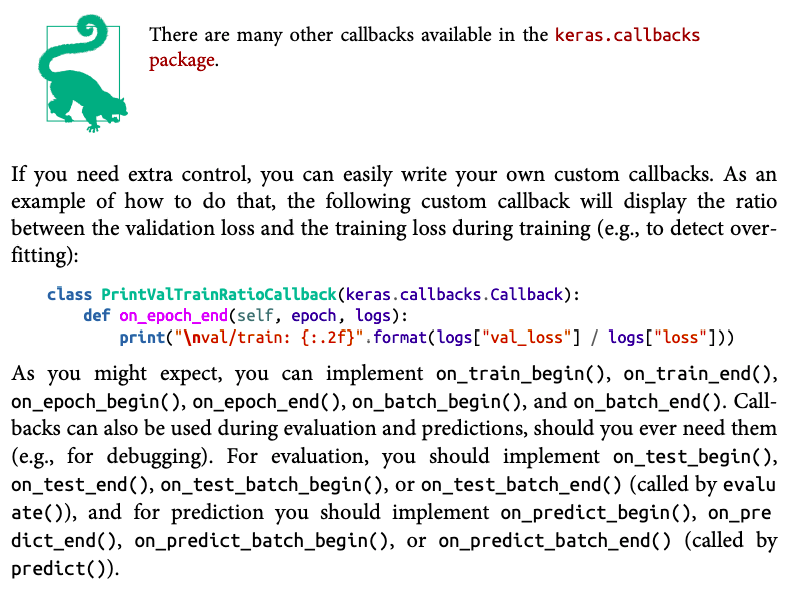

# TensorBoard for NN Model Visualization

- Helps us with the following :
    - visualize learning curves
    - compare learning curves between multiple runs
    - visualize computation graph
    - analyze training statistics
    - view images generated by the model
    - visualize complex multi-dimensional data projected down to 3D
    - and more
- To use, we must modify our code so that it outputs the data we want to visualize to special binary log files called ***event files***
- Each binary data record is called a ***summary***
- TensorBoard automatically monitors the log directory
- Helps vizualise live data with a little lag


In [166]:
import os

root_logdir = os.path.join(os.curdir, "TensorBoardLogs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [168]:
get_run_logdir() # FUnction where our logs will be stored

'./TensorBoardLogs/run_2023_12_31-17_46_05'

- Now, we need to start the server for TensorBoard and then use the tensorboard callback from keras

In [171]:
root_logdir

'./TensorBoardLogs'

- Run the following command in a new terminal tab

```zsh
tensorboard --logdir="./TensorBoardLogs" --port=6006
```

In [177]:
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit((X_train_A, X_train_B), y_train,
                    epochs=30, validation_data=[(X_valid_A, X_valid_B), y_valid],
                    callbacks=[tensorboard_cb]
                   )

Epoch 1/30
387/387 [==============================] - 1s 2ms/step - loss: 0.3209 - val_loss: 0.3258
Epoch 2/30
387/387 [==============================] - 1s 3ms/step - loss: 0.3209 - val_loss: 0.3193
Epoch 3/30
387/387 [==============================] - 1s 2ms/step - loss: 0.3208 - val_loss: 0.3358
Epoch 4/30
387/387 [==============================] - 1s 2ms/step - loss: 0.3207 - val_loss: 0.3575
Epoch 5/30
387/387 [==============================] - 1s 3ms/step - loss: 0.3205 - val_loss: 0.3257
Epoch 6/30
387/387 [==============================] - 1s 2ms/step - loss: 0.3204 - val_loss: 0.3434
Epoch 7/30
387/387 [==============================] - 1s 2ms/step - loss: 0.3203 - val_loss: 0.3446
Epoch 8/30
387/387 [==============================] - 1s 4ms/step - loss: 0.3204 - val_loss: 0.3375
Epoch 9/30
387/387 [==============================] - 1s 3ms/step - loss: 0.3200 - val_loss: 0.3256
Epoch 10/30
387/387 [==============================] - 2s 5ms/step - loss: 0.3200 - val_loss: 0.3394

# Hyperparameter Tuning

- To tune HPs in keras, we can use SK-Learn's ```GridSearchCV``` or ```RandomizedSearchCV```
- BUT, for that, we need to wrap our keras model in an object that can mimic as a SK-Learn regressor/classifier


## STEP 1
- Create a function that will create and compile the keras model

In [182]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
        model = keras.models.Sequential()
        model.add(keras.layers.InputLayer(input_shape=input_shape))
        for layer in range(n_hidden):
            model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.Dense(1))
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
        model.compile(loss="mse", optimizer=optimizer)
        return model

- The above function creates a univariate regression model with the given input shape and number of hidden layers

## STEP 2

- Let's create a KerasRegressor based on this functin build_model()

In [183]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/var/folders/6j/v9zb038n2bxdy2_vbd43mhnc0000gn/T/ipykernel_3320/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [184]:
keras_reg.fit(X_train, y_train,
              epochs=100, validation_data=[X_valid, y_valid],
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
387/387 [==============================] - 1s 3ms/step - loss: 0.9248 - val_loss: 0.6206
Epoch 2/100
387/387 [==============================] - 1s 3ms/step - loss: 0.5353 - val_loss: 0.5924
Epoch 3/100
387/387 [==============================] - 1s 2ms/step - loss: 0.4682 - val_loss: 0.5927
Epoch 4/100
387/387 [==============================] - 1s 3ms/step - loss: 0.4364 - val_loss: 0.6094
Epoch 5/100
387/387 [==============================] - 1s 2ms/step - loss: 0.4188 - val_loss: 0.4985
Epoch 6/100
387/387 [==============================] - 1s 2ms/step - loss: 0.4068 - val_loss: 0.4020
Epoch 7/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3988 - val_loss: 0.5787
Epoch 8/100
387/387 [==============================] - 1s 2ms/step - loss: 0.3923 - val_loss: 0.3785
Epoch 9/100
387/387 [==============================] - 1s 3ms/step - loss: 0.3870 - val_loss: 0.4385
Epoch 10/100
387/387 [==============================] - 1s 2ms/step - loss: 0.3831 - val_lo

In [185]:
mse_test = keras_reg.score(X_test, y_test) # we now have sklearn methods

y_pred = keras_reg.predict(X_new)

129/129 [==============================] - 0s 2ms/step - loss: 0.5225


1/1 [==============================] - 0s 74ms/step


In [188]:
y_pred

array([2.4204297, 2.8891943, 2.6614046, 1.4041723], dtype=float32)

- As the warning says that this method of wrappers is depricated
- We can use sci-keras to get the same as well as better functionalities

In [193]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [194]:
params = {
    "n_hidden" : [0,1,2,3,4],
    "n_neurons" : [30, 50, 70],
    "learning_rate": [0.001, 0.01, 1/3e-4]
}

In [197]:
random_search = RandomizedSearchCV(keras_reg, params, cv=4, n_iter=10, scoring='neg_mean_squared_error')

- We are passing just the data below to fit
- We can also pass validation data, callbacks, etc. Just like in the keras model

In [198]:
random_search.fit(X_train, y_train)

291/291 [==============================] - 1s 2ms/step - loss: 4.5258


97/97 [==============================] - 0s 2ms/step


/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/pushpakruhil/

97/97 [==============================] - 0s 1ms/step


/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/pushpakruhil/

97/97 [==============================] - 0s 1ms/step


/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/pushpakruhil/

97/97 [==============================] - 0s 1ms/step


/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/pushpakruhil/

97/97 [==============================] - 0s 1ms/step


/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/pushpakruhil/

97/97 [==============================] - 0s 1ms/step


/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/pushpakruhil/

97/97 [==============================] - 0s 1ms/step


/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/pushpakruhil/

97/97 [==============================] - 0s 1ms/step


/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 438, in mean_squared_error
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/pushpakruhil/

97/97 [==============================] - 0s 2ms/step


/Users/pushpakruhil/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-2.35784039 -0.46418215 -1.04313376 -1.09960222         nan -0.58394633
         nan -1.02309588 -0.48977429 -0.48256889]
  warnings.warn(


387/387 [==============================] - 1s 2ms/step - loss: 0.6362


RandomizedSearchCV(cv=4,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc0009ded90>,
                   param_distributions={'learning_rate': [0.001, 0.01,
                                                          3333.3333333333335],
                                        'n_hidden': [0, 1, 2, 3, 4],
                                        'n_neurons': [30, 50, 70]},
                   scoring='neg_mean_squared_error')

In [200]:
random_search.best_params_

{'n_neurons': 70, 'n_hidden': 2, 'learning_rate': 0.01}

In [203]:
random_search.best_estimator_.model

- This was one trick to tune the HPs for NNs
- There are many other python libraries as well which can be used to tune the HPs
- Here are a few:
1. Keras Tuner: One of the most widely used one, i guess
1. Hyperopt
1. Hyperas
1. Scikit-optimize
1. Spearmint
1. Hyperbond
1. Sklearn-deap


# Hyperparameter Tuning - Different HPs

## Number of Hidden Layers
- Single hidden layer NN can also learn really complex models, given sufficient number of neurons. 
- BUT, DNNs have higher parameter efficiency than shallow ones:
    - They can model complex functions using exponentially fewer neurons than shallow nets, allowing them to reach much better performance with the same amount of training data 
- In summary, Start with 1 or 2 hidden layers
    - Ramp them up until you reach a point where you start to overfit the training data
    
### Transfer Learning
- You don't have to train the NN from scratch when the task is similar to some other task
- For example, we have a model that can recognize faces.
- We want to train a NN to recognize hairstyles
- Here, we can use weights and biases of the first few layers.
- This is called transfer learning


## Number of Neurons per Hidden Layer
- Number of neurons in the input and the output layers are defined by the data
- Good idea to have a pyramid like strucure
    - Eg: 100, 60, 40, 20 neurons in each hidden layer in the sequence
- But, same number of neurons in each hidden layer is equally good and also gives us an advantage
    - There is only 1 HP for number of neurons for the entire arch, in contract to 1 HP for number of neurons per hidden layer
- A good tactic is to have high number of hidden layers with decent number of neurons and use EARLY STOPPING
    - If we have less neurons, we might lose some information
    - Eg: Say we have 2 neurons in the first hidden layer
        - If the model's output is 3D, we'll only get a 2D projected output no matter how many neurons we have ahead
- In general, increasing the number of hidden layers will get us more bangs for our buck rather than increasing the number of neurons per layer


## Learning Rate
- Most important HP
- In general, the optimal LR is about half of the maximum LR
    - Max MR: the LR above which the training algorithm diverges
- One way to find a good LR is to train the model for a few hundred iterations starting with a very low LR ($10^{-5}$) and gradually increasing it up to a very large value(10)
- This can be done by multiplying the LR with a constant. factor at each iteration
- If you plot the loss as a function of the learning rate (using a log scale for the learning rate), you should see it dropping at first. But after a while, the learning rate will be too large, so the loss will shoot back up
    - The optimal LR would be a bit lower than the point at which the loss starts to climb
    - Typically 10 times lower than the turning point
- After you have the optimal LR, re-initialize the model and train it normally using this LR


## Optimizer
- Choosing a better optimizer than plain old mini-batch GD and then tuning it is also quite important
- More to be seen later


## Batch Size
- The batch size can have a significant impact on your model’s performance and training time. 
- The main benefit of using large batch sizes is that hardware accelerators like GPUs can process them efficiently, so the training algorithm will see more instances per second. 
- Therefore, many researchers recommend using the largest batch size that can fit in GPU RAM. 
- There’s a catch, though: in practice, large batch sizes often lead to training instabilities, especially at the beginning of training, and the resulting model may not generalize as well as a model trained with a small batch size. 
- A research paper concluded that using small batches (from 2 to 32) was preferable because small batches led to better models in less training time. 
- Other papers showed that it was possible to use very large batch sizes (up to 8,192) using various techniques such as warming up the learning rate (i.e., starting training with a small learning rate, then ramping it up, to be seen later). 
    - This led to a very short training time, without any generalization gap. 
- So, **one strategy** is to try to use a large batch size, using learning rate warmup, and if training is unstable or the final performance is disappointing, then try using a small batch size instead.


## Activation Function
- Discussed previously
- ReLU is a good default for the hidden layers
- Activation for the output layer really depends on the task that we are trying to perform


## Number of Iterations
- In most cases, the epoch does not actually need to be tweaked
- **Just use *Early Stopping* instead**

# Exercises
- Questions from the chapter to try

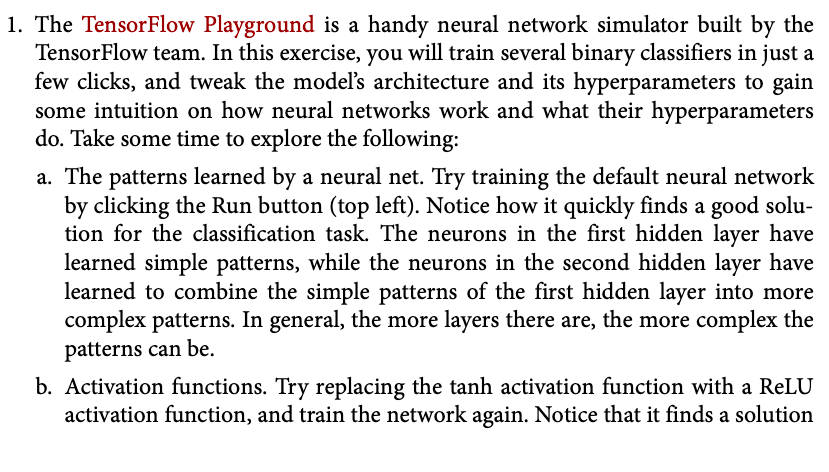
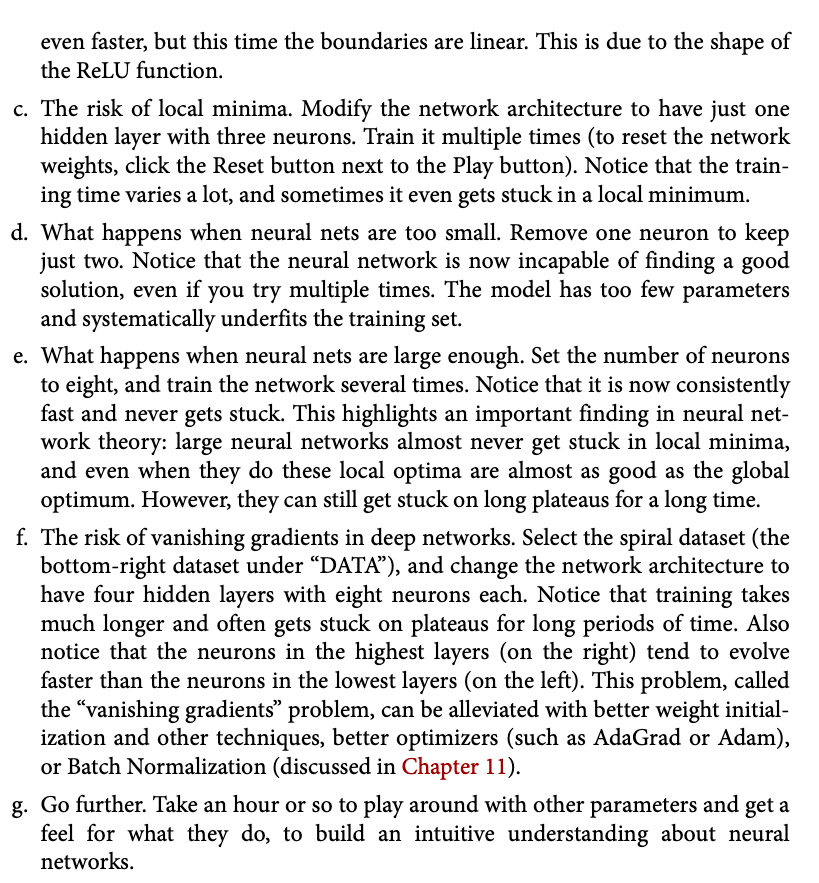
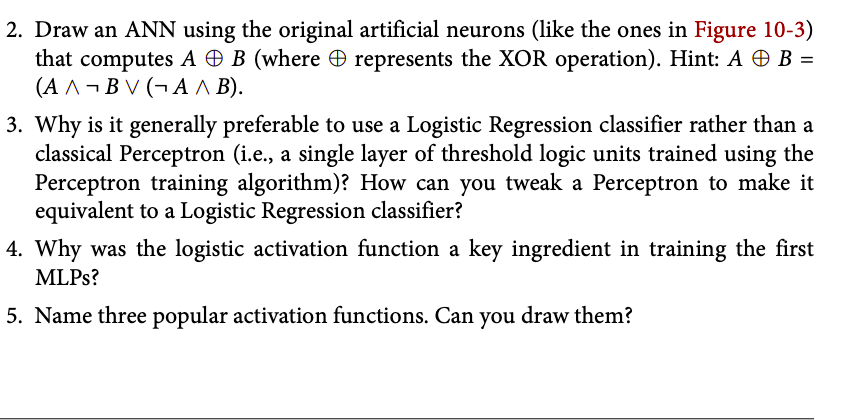
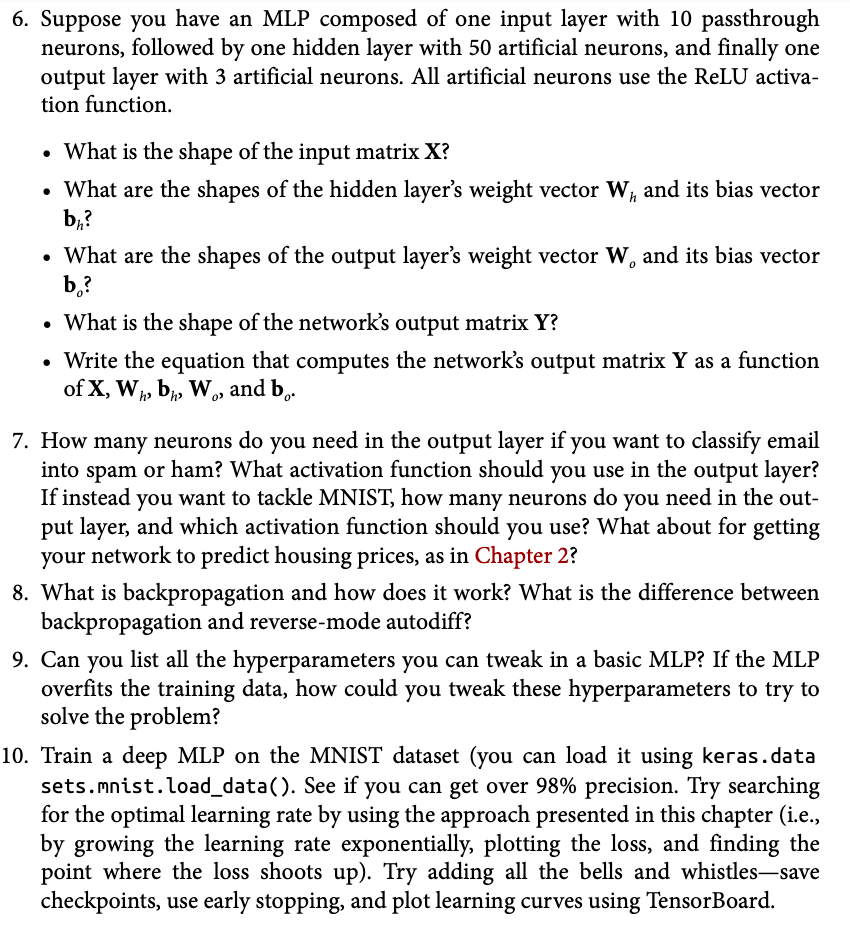